In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

'en_US.UTF-8'

In [34]:
df_rnn = pd.read_csv("output_wfss_rnn.csv")
df_var = pd.read_csv("../muia-tfm-var/output.var.20170407-171800.csv")
df_market_price = pd.read_csv("market_price.csv")
print(len(df_var))
df_var.head()

   VAR-Prediction
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN

2673


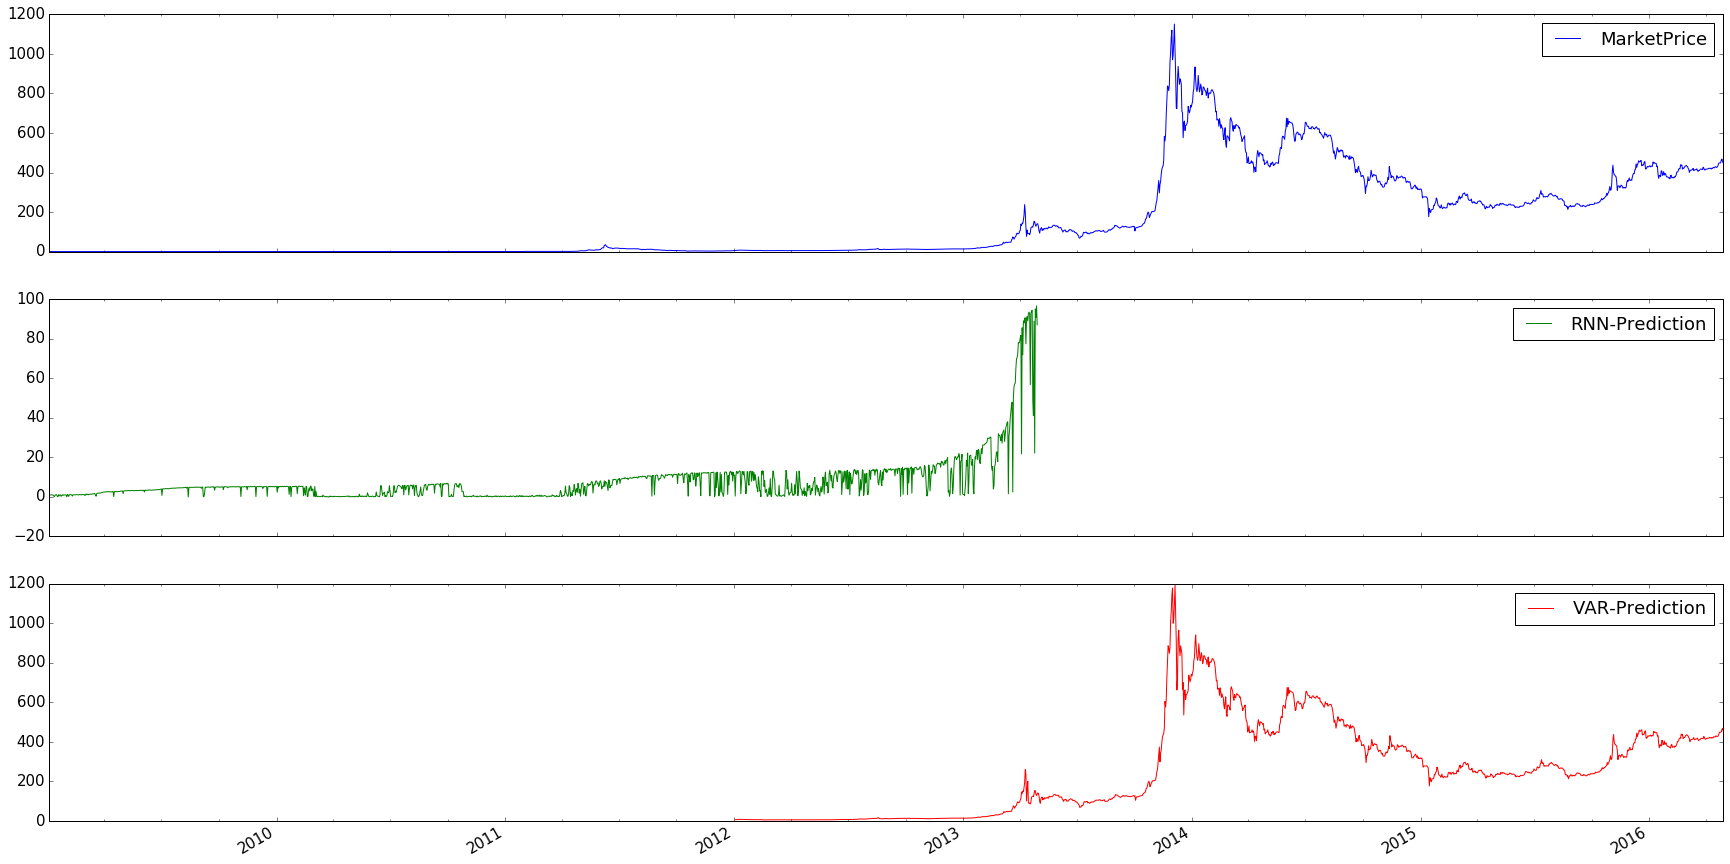

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb8441e2b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ffb7fd9de48>], dtype=object)

In [35]:
df_merge = pd.concat([df_market_price, df_rnn, df_var], ignore_index = True, axis = 1)
df_merge = df_merge.rename(columns = {0:'MarketPrice',1:'RNN-Prediction', 2:'VAR-Prediction'})
df_merge.index = pd.date_range(start = '2009-01-03', end = '2016-04-28')
font = { 'family' : 'normal',
         'weight' : 'normal',
         'size' : 15 }
matplotlib.rc('font', **font)
df_merge.plot(figsize = (30,16), subplots = True)

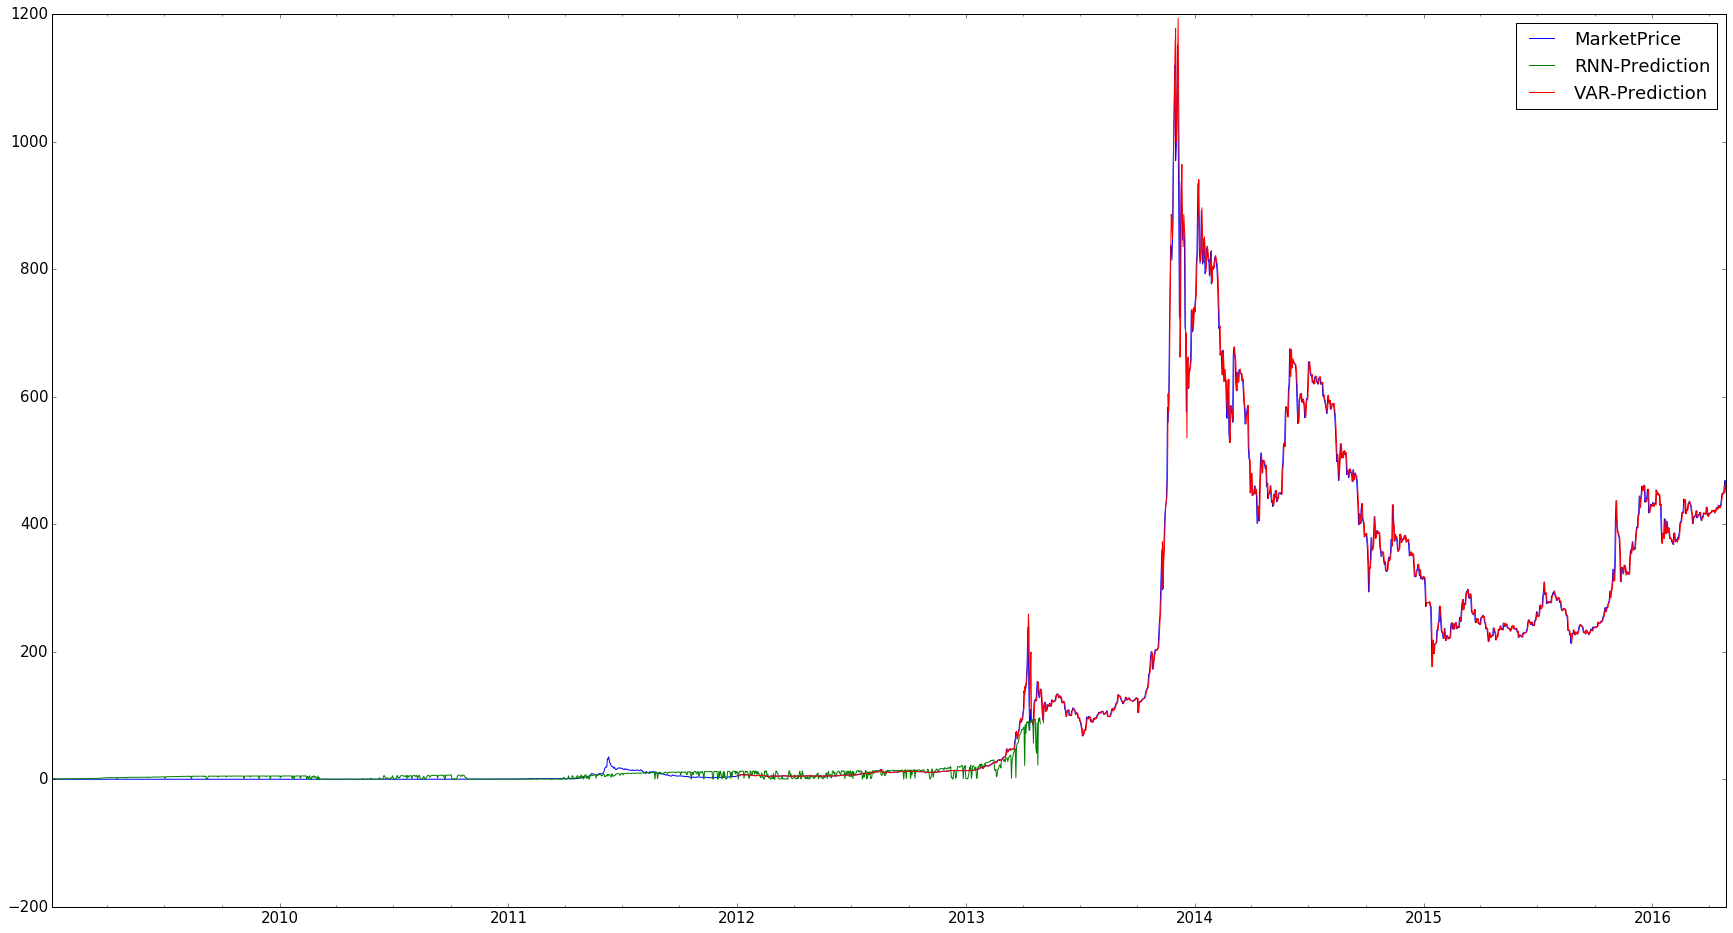

In [36]:
df_merge.plot(figsize = (30,16))

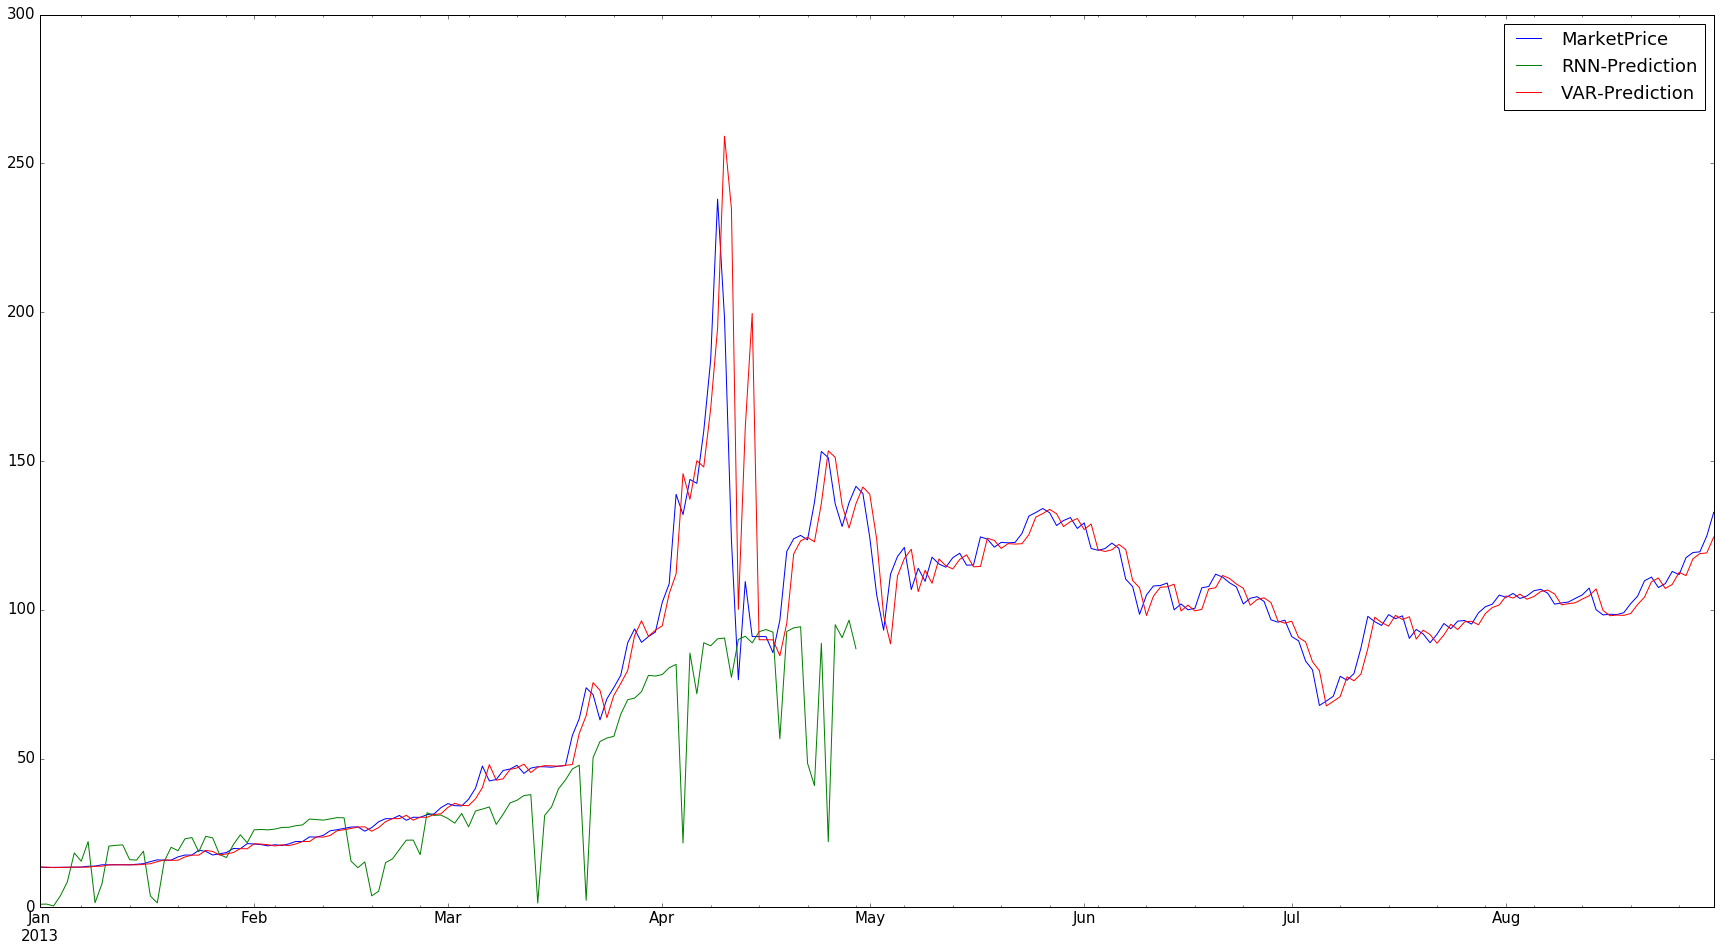

In [37]:
start = df_merge.index.searchsorted(pd.datetime(2013, 1, 1))
end = df_merge.index.searchsorted(pd.datetime(2013, 9, 1))

df_merge.ix[start:end].plot(figsize = (30,16))

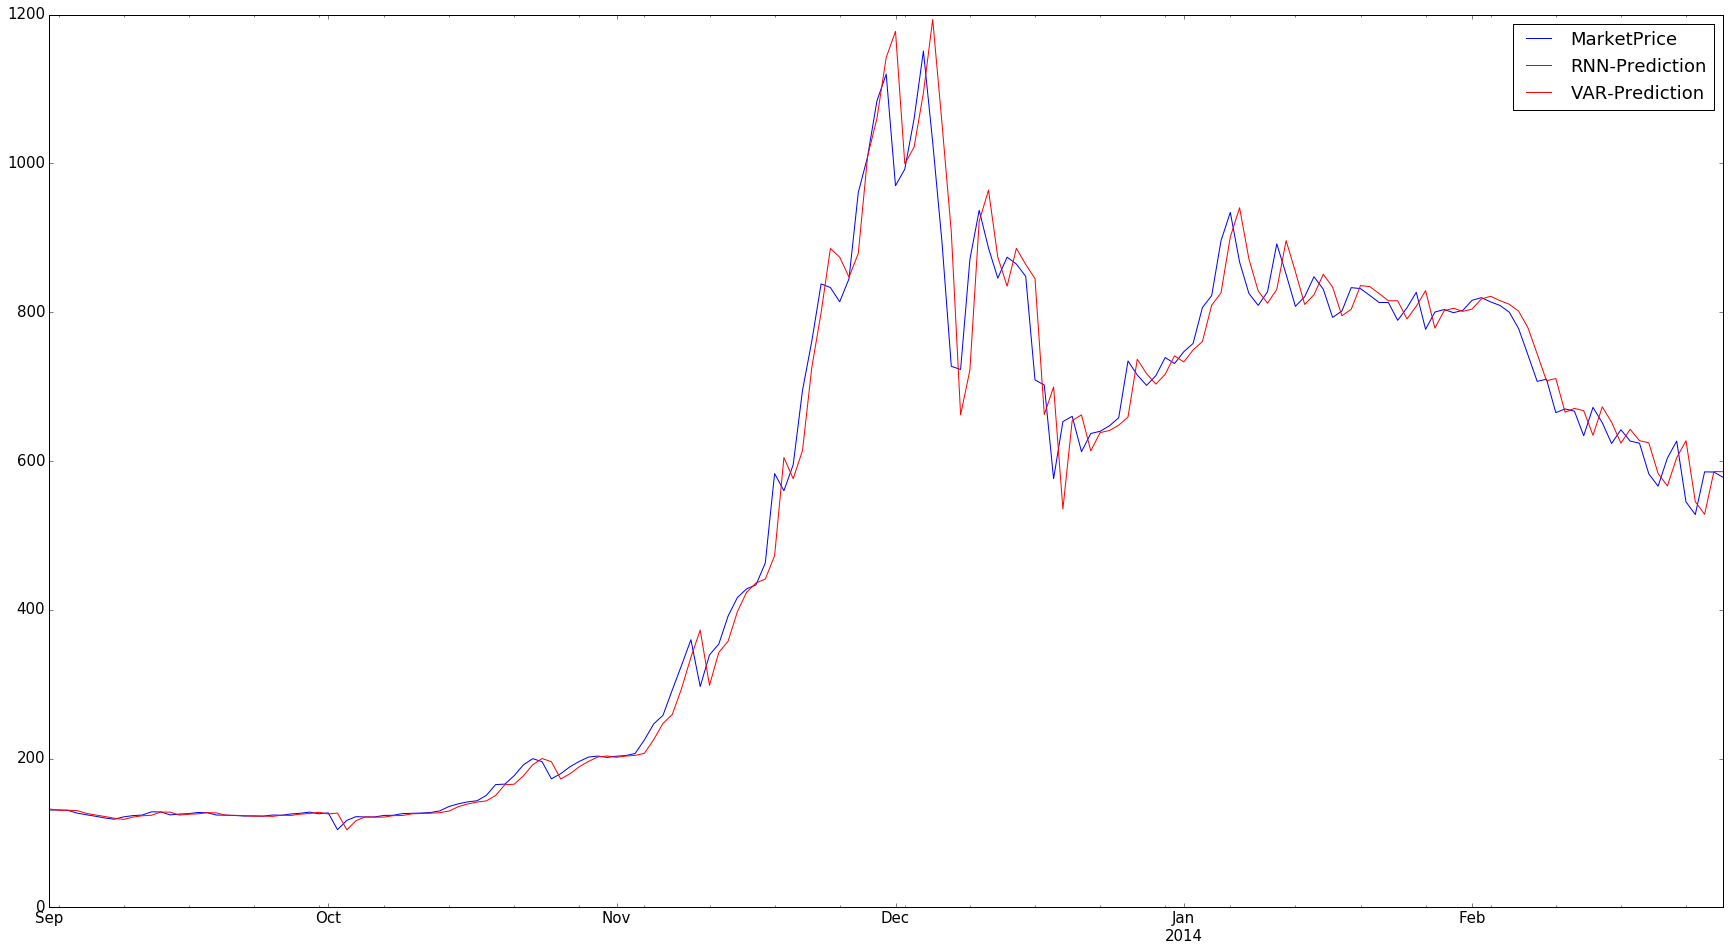

In [38]:
start = df_merge.index.searchsorted(pd.datetime(2013, 9, 1))
end = df_merge.index.searchsorted(pd.datetime(2014, 3, 1))

df_merge.ix[start:end].plot(figsize = (30,16))

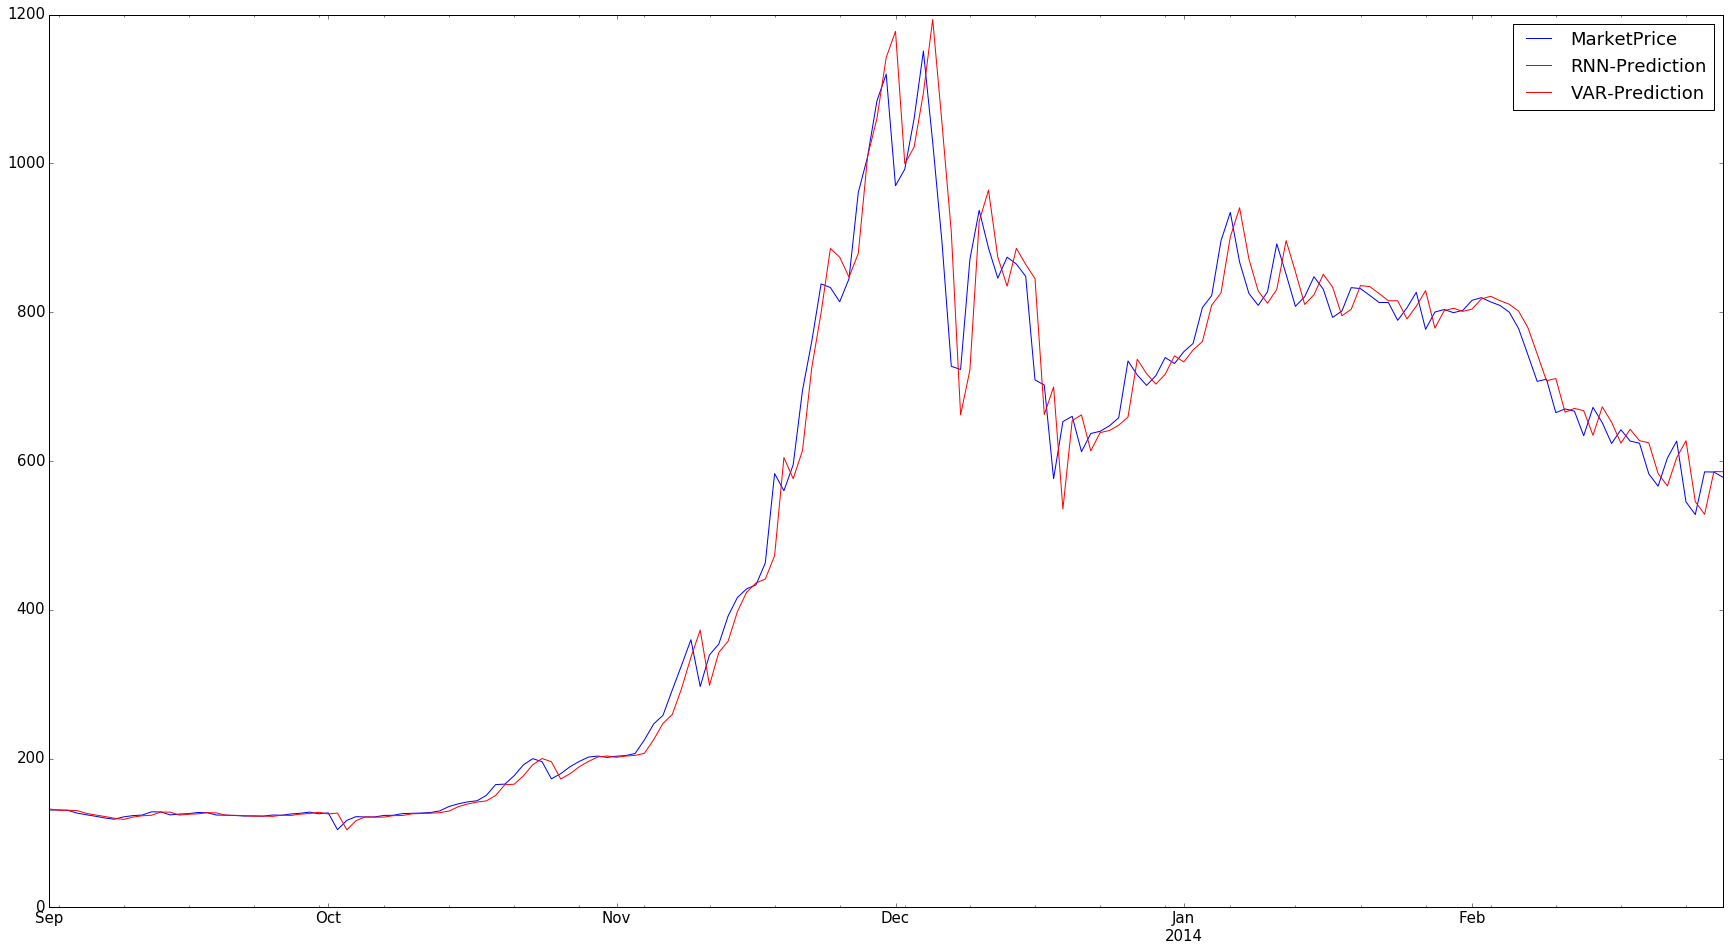

In [39]:
start = df_merge.index.searchsorted(pd.datetime(2013, 9, 1))
end = df_merge.index.searchsorted(pd.datetime(2014, 3, 1))

df_merge.ix[start:end].plot(figsize = (30,16))


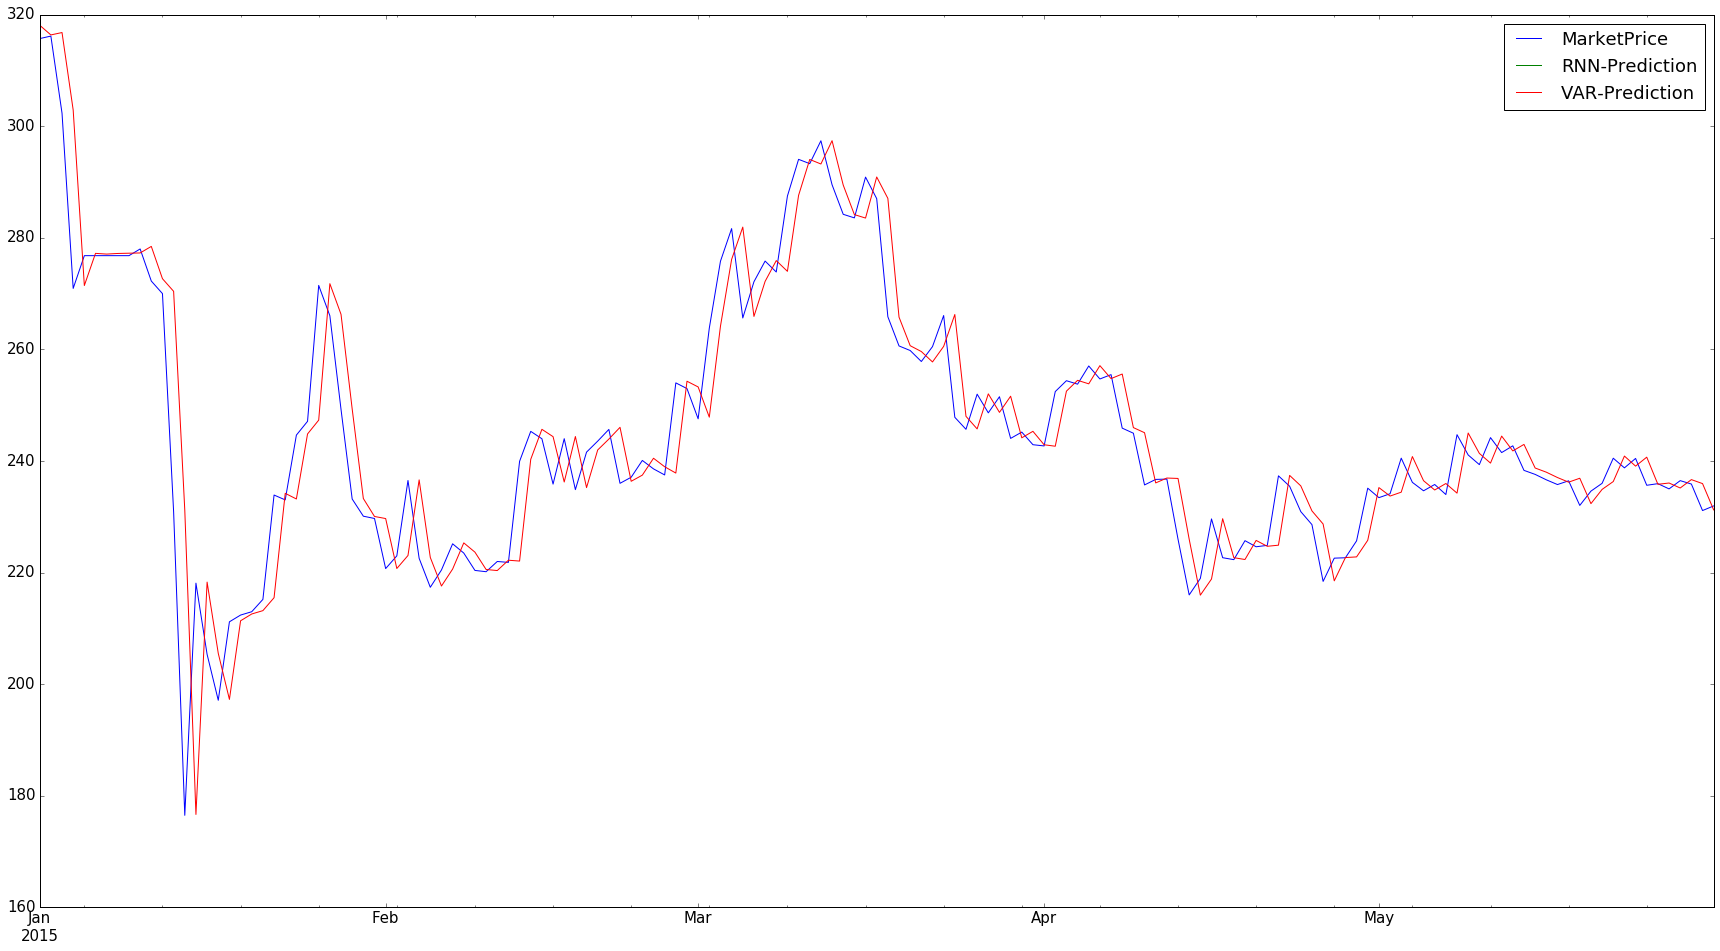

In [40]:
start = df_merge.index.searchsorted(pd.datetime(2015, 1, 1))
end = df_merge.index.searchsorted(pd.datetime(2015, 6, 1))

df_merge.ix[start:end].plot(figsize = (30,16))


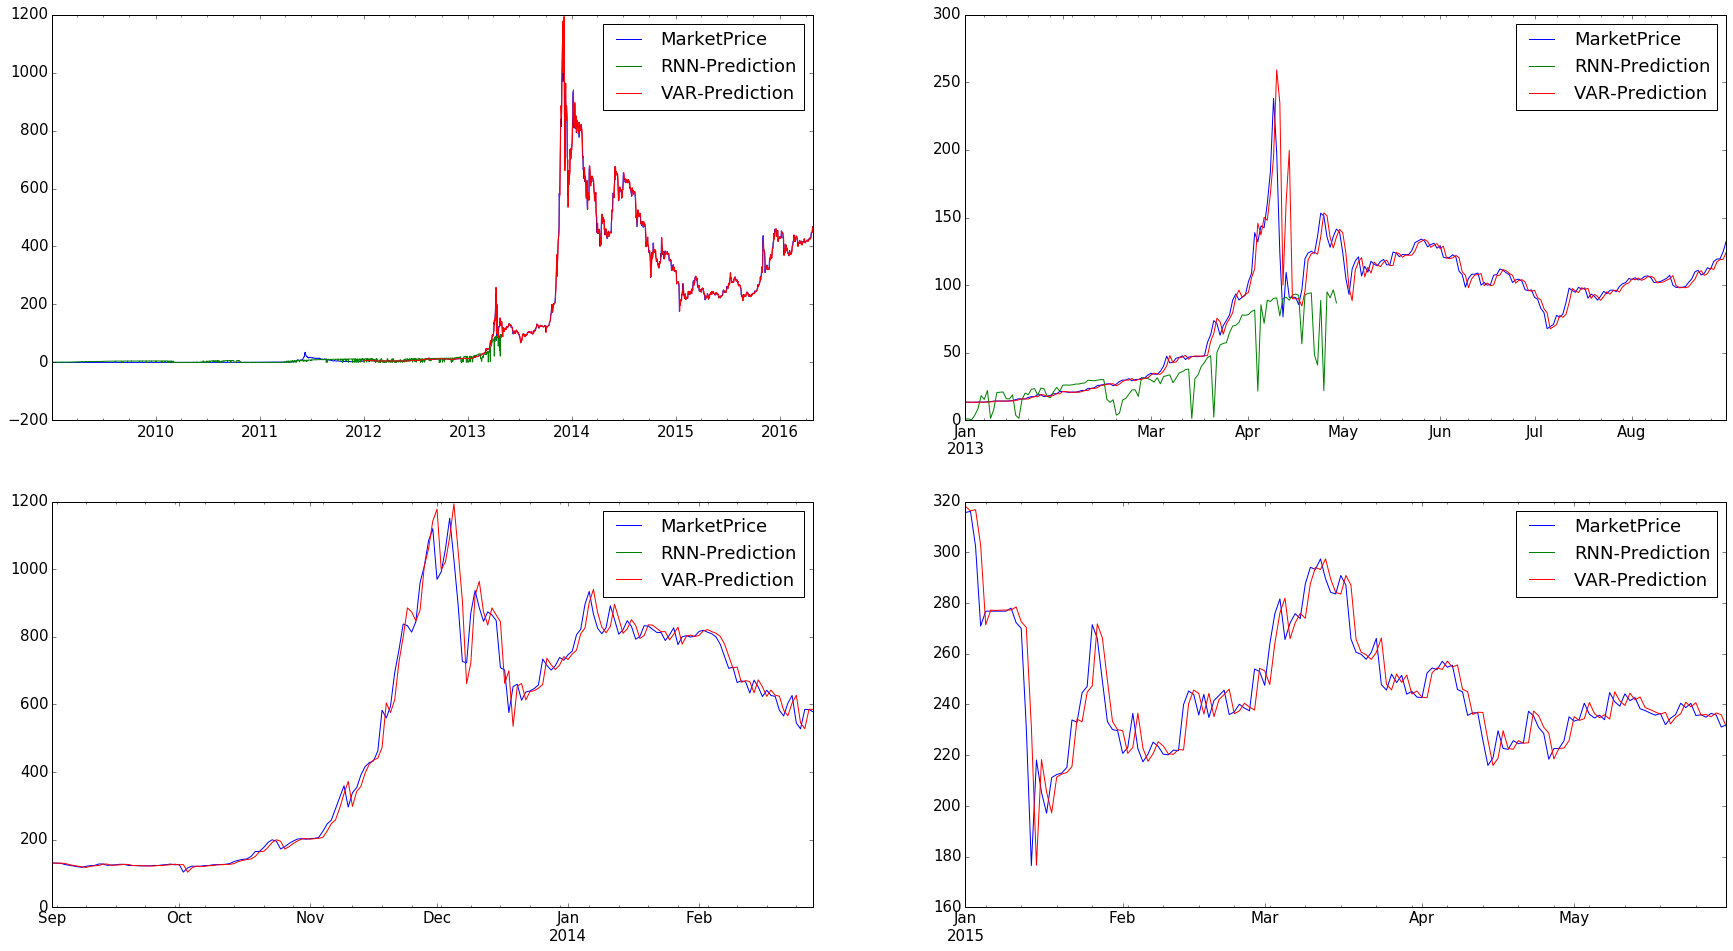

In [41]:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 16))

# 1
start = df_merge.index.searchsorted(pd.datetime(2013, 1, 1))
end = df_merge.index.searchsorted(pd.datetime(2013, 9, 1))

df_2013 = df_merge.ix[start:end]

start = df_merge.index.searchsorted(pd.datetime(2013, 9, 1))
end = df_merge.index.searchsorted(pd.datetime(2014, 3, 1))

df_2014 = df_merge.ix[start:end]

start = df_merge.index.searchsorted(pd.datetime(2015, 1, 1))
end = df_merge.index.searchsorted(pd.datetime(2015, 6, 1))

df_2015 = df_merge.ix[start:end]

df_merge.plot(ax = axes[0, 0])
df_2013.plot(ax = axes[0, 1])
df_2014.plot(ax = axes[1, 0])
df_2015.plot(ax = axes[1, 1])

In [42]:
df_merge.to_csv("prediction-merge.csv", na_rep = "NA")

In [43]:
row = next(df_merge.iterrows())
row[1]

MarketPrice       0.000000
RNN-Prediction    0.808716
VAR-Prediction         NaN
Name: 2009-01-03 00:00:00, dtype: float64

In [44]:
#MAE
rnn_mae = 0
var_mae = 0

#MSE
rnn_mse = 0
var_mse = 0

#MAPE
rnn_mape = 0
var_mape = 0

length = 0

for row in df_merge.iterrows():
    if not np.isnan(row[1][1]):
        length += 1
        
        rnn_error = row[1][0] - row[1][1]
        var_error = row[1][0] - row[1][2]
        
        rnn_mae += abs(rnn_error)
        var_mae += abs(var_error)

        rnn_mse += rnn_error**2
        var_mse += var_error**2

        rnn_mape += abs(100 * rnn_error/row[1][0])
        var_mape += abs(100 * var_error/row[1][0])

rnn_mae /= length
var_mae /= length

rnn_mse /= length
var_mse /= length

rnn_mape /= length
var_mape /= length

print("RNN MAE: ", rnn_mae)
print("VAR MAE: ", var_mae)
print("RNN MSE: ", rnn_mse)
print("VAR MSE: ", var_mse)
print("RNN MAPE: ", rnn_mape)
print("VAR MAPE: ", var_mape)

RNN MAE:  4.64730826889
VAR MAE:  nan
RNN MSE:  107.250540557
VAR MSE:  nan
RNN MAPE:  inf
VAR MAPE:  nan


In [32]:
np.sqrt(4)

2.0

In [31]:
# U statistic
rnn_U_numerator = 0
rnn_U_denominator = 0
var_U_numerator = 0
var_U_denominator = 0

length = 0

prev_y = df_merge['MarketPrice'][0]

for i in range(len(df_merge)):
    if not np.isnan(df_merge['RNN-Prediction'][i]):
        length += 1

        rnn_prediction = df_merge['RNN-Prediction'][i]
        market_price = df_merge['MarketPrice'][i]
        var_prediction = df_merge['VAR-Prediction'][i]

        # if market_price == 0.0:
        #     market_price += 0.0000001

        # if rnn_prediction == 0.0:
        #     rnn_prediction += 0.0000001

        # if var_prediction == 0.0:
        #     var_prediction += 0.0000001

        if prev_y == 0.0:
            prev_y += 0.00000000000000000000000000000000000000001


        rnn_U_numerator += ((rnn_prediction - market_price)/prev_y)**2
        rnn_U_denominator += ((market_price - prev_y)/prev_y)**2

        var_U_numerator += ((var_prediction - market_price)/prev_y)**2
        var_U_denominator += ((market_price - prev_y)/prev_y)**2

        prev_y = df_merge['MarketPrice'][i]

print(rnn_U_numerator)
        
rnn_U = np.sqrt(rnn_U_numerator/rnn_U_denominator)
var_U = np.sqrt(var_U_numerator/var_U_denominator)

print("RNN U statistic: ", rnn_U)
print("VAR U statistic: ", var_U)

6.25819970913e+82
RNN U statistic:  0.472899698355
VAR U statistic:  0.0358829242224


In [17]:
(-1.15196899414/0.0)**2

ZeroDivisionError: float division by zero